In [41]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2019-07-12T21:14:31-05:00

CPython 3.7.1
IPython 7.2.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-20-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


### Coeficiente de determinación (R cuadrado)

El coeficiente de determinación, se define como la proporción de la varianza total de la variable explicada por la regresión. El coeficiente de determinación, también llamado __R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar.__

Es importante saber que el resultado del coeficiente de determinación __oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.__

__Permite hacer predicciones sobre el crecimiento o variación de un dato determinado según como se correlaciona con otras variables. El R cuadrado es el indicador que nos permitirá conocer cómo de bien se pueden predecir esos resultados.__


__Mientras mayor sea la varianza que explica el modelo de regresión, más cerca estarán los puntos de los datos de la línea de regresión ajustada.__

La sieguiente esxpresion corresponde a la varianza, pero con dos diferencias fundamentales.

$ R^2 = \frac{\displaystyle\sum_{t=1}^T (\widehat{y_{t}}-\bar{y})}{\displaystyle\sum_{t=1}^T (y_{t}-\bar{y})}$

1. $ \widehat{y} $ es la estimación de un modelo sobre lo que según las variables explicativas vale Y, pero no es el valor real de Y, sino una estimación de Y.

2. En segundo lugar, faltaría dividir entre T. Que, en otros casos, se nota como N o número de observaciones. Sin embargo, dado que la fórmula del denominador también la llevaría, eliminamos los denominadores (parte de abajo) de ambas fórmulas para simplificar la expresión. De esta manera es más fácil trabajar con ella.


#### El problema del coeficiente de determinación

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con los goles que anota Cristiano Ronaldo en una temporada, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.


#### El coeficiente de determinación ajustado

___El R2 ajustado es el porcentaje de variación en la variable de respuesta que es explicado por su relación con una o más variables predictoras, ajustado para el número de predictores en el modelo. 
Es decir, a medida que incluyamos más variables en el modelo, el R cuadrado aumentará por lo que puede hacernos pensar que el modelo es mejor porque incluye más variables.
Para comprobar si es cierto que nuestro modelo es mejor por la inclusión de nuevas variables debemos analizar el R cuadrado ajustado.___

El coeficiente de determinación ajustado (R cuadrado ajustado) es la medida que define el porcentaje explicado por la varianza de la regresión en relación con la varianza de la variable explicada. Es decir, lo mismo que el R cuadrado, pero con una diferencia. Esa diferencia se encuentra en que el coeficiente de determinación ajustado penaliza la inclusión de variables.

Cómo hemos dicho anteriormente el coeficiente de determinación de un modelo aumenta aunque las variables que incluyamos no sean relevantes. Ya que esto supone un problema, para intentar solventarlo el R cuadrado ajustado queda tal que:

$ \bar{R^2} = 1 - \frac{N-1}{N-k-1}[1-R^2] $


Donde N es el tamaño de la muestra y k el número de variables explicativas. Por deducción matemática, a valores más altos de k, más alejado estará el R cuadrado ajustado del R cuadrado normal. Al revés a valores más bajos de k, más cerca estará de 1 la fracción central y, por tanto, más parecidos serán el R cuadrado ajustado y el R cuadrado normal.

Recordando que k es el número de variables explicativas, deducimos que éste no puede ser cero. Si fuese cero, no existiría modelo. Como mínimo tendremos que explicar una variable en función de otra variable. Dado que k debe ser como mínimo 1, el R cuadrado ajustado y el R cuadrado normal no pueden tener el mismo valor. Es más, el R cuadrado ajustado será siempre inferior al R cuadrado normal.

___En la siguiente tabla observamos como con una variable el R cuadrado es del 52%. Al agregar el segundo término, usted observa que el R2 ajustado mejoró, lo que indica que la segunda variable mejoró el modelo. Con el tercer término,  aunque el R2 aumenta, el R2 ajustado no lo hace. Puesto que la tercera variable no mejoró el modelo, podríamos considerar eliminarla del modelo.___

In [35]:
import pandas as pd
import statsmodels.formula.api as sfm
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

In [5]:
data = pd.read_csv("DataSets/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
lm = sfm.ols(formula='Sales~TV',data=data).fit() #Crea un modelo que se ajusta a los parametros

In [9]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

### Predict Linear Model Predict

$ Sales = 7.032594 + 0.047537*TV $ 

$ \alpha = 7.032594 $

$ \beta = 0.047537 $

### P values

In [10]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### RSquared

In [12]:
lm.rsquared

0.611875050850071

### Sumary

In [17]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: Sales            AIC:                1042.0913
Date:               2019-07-12 19:15 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Prob(Omnibus):        0.767         Jarque-Bera (JB):        0.669
Skew:                 -0.089        Prob(JB):                0.716
Kurtosis:             2.779         Condition No.:           338  
==================================================================

"""

### Make a prediction

In [22]:
sales_pred =  lm.predict(pd.DataFrame(data["TV"]))
sales_pred.head()

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

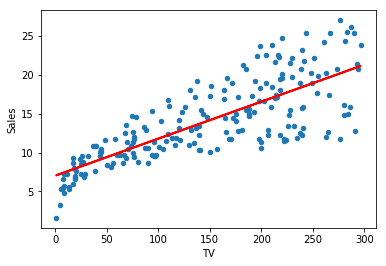

In [21]:
%matplotlib inline
data.plot(kind='scatter', x='TV',y='Sales')
plt.plot(pd.DataFrame(data["TV"]),sales_pred,c='red', linewidth=2)

In [23]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [26]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [27]:
SSD = sum(data["RSE"])

In [29]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [30]:
sales_mean = np.mean(data["Sales"]) #Numerode ventas promedio

In [31]:
sales_mean

14.0225

In [32]:
error = RSE/sales_mean #Ratio de error

In [39]:
print("Error Model's percent :{}%".format(ceil(error*100)))

Error Model's percent :24%


(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

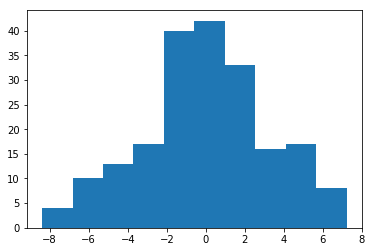

In [40]:
plt.hist(data["Sales"]-data["sales_pred"])